In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
import urllib2
import re

###### Ref https://raw.github.com/cs109/content/master/HW1.ipynb
I will perform a simple analysis of polling data about the upcoming Governor races.First i will build some tools to download historical polling data from the web, and parse it into a more convenient format.Next you will use these tools to aggregate and visualize several past Governor races.Finally you will run a bootstrap analysis to estimate the probable outcome of current Governor races, given the level of precision of historical polls.

The [Real Clear Politics](http://www.realclearpolitics.com) website archives many political polls. In addition, they combine related polls to form an \"RCP average\" estimate of public opinion over time. For example, the chart on [this page](http://www.realclearpolitics.com/epolls/2012/president/us/general_election_romney_vs_obama-1171.html) shows historical polling data for the Obama-Romney presidential race. The chart is an average of the polling data table below the chart.

The data used to generate plots like this are stored as XML pages, with URLs like:, "http://charts.realclearpolitics.com/charts/[id].xml"  
Here, [id] is a unique integer, found at the end of the URL of the page that displays the graph. The id for the Obama-Romney race is 1171 "http://charts.realclearpolitics.com/charts/1171.xml" 

Notice that XML tags are nested inside each other, hierarchically (the jargony term for this is the "Document Object Model", or "DOM"). The first step of webscraping is almost always exploring the HTML/XML source in a browser, and getting a sense of this hierarchy.

In [3]:
#Getting Response from the above url into text 
url = 'http://charts.realclearpolitics.com/charts/1171.xml'
response = requests.get(url)
response.text

u'<?xml version="1.0" encoding="UTF-8"?><chart><series><value xid=\'0\'>2/01/2011</value><value xid=\'1\'>2/02/2011</value><value xid=\'2\'>2/03/2011</value><value xid=\'3\'>2/04/2011</value><value xid=\'4\'>2/05/2011</value><value xid=\'5\'>2/06/2011</value><value xid=\'6\'>2/07/2011</value><value xid=\'7\'>2/08/2011</value><value xid=\'8\'>2/09/2011</value><value xid=\'9\'>2/10/2011</value><value xid=\'10\'>2/11/2011</value><value xid=\'11\'>2/12/2011</value><value xid=\'12\'>2/13/2011</value><value xid=\'13\'>2/14/2011</value><value xid=\'14\'>2/15/2011</value><value xid=\'15\'>2/16/2011</value><value xid=\'16\'>2/17/2011</value><value xid=\'17\'>2/18/2011</value><value xid=\'18\'>2/19/2011</value><value xid=\'19\'>2/20/2011</value><value xid=\'20\'>2/21/2011</value><value xid=\'21\'>2/22/2011</value><value xid=\'22\'>2/23/2011</value><value xid=\'23\'>2/24/2011</value><value xid=\'24\'>2/25/2011</value><value xid=\'25\'>2/26/2011</value><value xid=\'26\'>2/27/2011</value><value xid

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,'html.parser')

In [5]:
soup.prettify()

u'<?xml version="1.0" encoding="UTF-8"?>\n<chart>\n <series>\n  <value xid="0">\n   2/01/2011\n  </value>\n  <value xid="1">\n   2/02/2011\n  </value>\n  <value xid="2">\n   2/03/2011\n  </value>\n  <value xid="3">\n   2/04/2011\n  </value>\n  <value xid="4">\n   2/05/2011\n  </value>\n  <value xid="5">\n   2/06/2011\n  </value>\n  <value xid="6">\n   2/07/2011\n  </value>\n  <value xid="7">\n   2/08/2011\n  </value>\n  <value xid="8">\n   2/09/2011\n  </value>\n  <value xid="9">\n   2/10/2011\n  </value>\n  <value xid="10">\n   2/11/2011\n  </value>\n  <value xid="11">\n   2/12/2011\n  </value>\n  <value xid="12">\n   2/13/2011\n  </value>\n  <value xid="13">\n   2/14/2011\n  </value>\n  <value xid="14">\n   2/15/2011\n  </value>\n  <value xid="15">\n   2/16/2011\n  </value>\n  <value xid="16">\n   2/17/2011\n  </value>\n  <value xid="17">\n   2/18/2011\n  </value>\n  <value xid="18">\n   2/19/2011\n  </value>\n  <value xid="19">\n   2/20/2011\n  </value>\n  <value xid="20">\n   2/21/

In [6]:
Date = [val.text for val in soup.find_all('value') if val.parent.name == 'series']
#X axis value in Graph 
Date

[u'2/01/2011',
 u'2/02/2011',
 u'2/03/2011',
 u'2/04/2011',
 u'2/05/2011',
 u'2/06/2011',
 u'2/07/2011',
 u'2/08/2011',
 u'2/09/2011',
 u'2/10/2011',
 u'2/11/2011',
 u'2/12/2011',
 u'2/13/2011',
 u'2/14/2011',
 u'2/15/2011',
 u'2/16/2011',
 u'2/17/2011',
 u'2/18/2011',
 u'2/19/2011',
 u'2/20/2011',
 u'2/21/2011',
 u'2/22/2011',
 u'2/23/2011',
 u'2/24/2011',
 u'2/25/2011',
 u'2/26/2011',
 u'2/27/2011',
 u'2/28/2011',
 u'3/01/2011',
 u'3/02/2011',
 u'3/03/2011',
 u'3/04/2011',
 u'3/05/2011',
 u'3/06/2011',
 u'3/07/2011',
 u'3/08/2011',
 u'3/09/2011',
 u'3/10/2011',
 u'3/11/2011',
 u'3/12/2011',
 u'3/13/2011',
 u'3/14/2011',
 u'3/15/2011',
 u'3/16/2011',
 u'3/17/2011',
 u'3/18/2011',
 u'3/19/2011',
 u'3/20/2011',
 u'3/21/2011',
 u'3/22/2011',
 u'3/23/2011',
 u'3/24/2011',
 u'3/25/2011',
 u'3/26/2011',
 u'3/27/2011',
 u'3/28/2011',
 u'3/29/2011',
 u'3/30/2011',
 u'3/31/2011',
 u'4/01/2011',
 u'4/02/2011',
 u'4/03/2011',
 u'4/04/2011',
 u'4/05/2011',
 u'4/06/2011',
 u'4/07/2011',
 u'4/08/20

In [7]:
len(Date)

652

In [8]:
# Getting graph data for Obama and Romney
soup.find_all('graph')

[<graph balloon_color="#3B5998" color="#3B5998" gid="1" title="Obama"><value xid="0">47.5</value><value xid="1">47.5</value><value xid="2">47.5</value><value xid="3">47.5</value><value xid="4">47.5</value><value xid="5">47.5</value><value xid="6">46.4</value><value xid="7">46.4</value><value xid="8">46.7</value><value xid="9">46.7</value><value xid="10">47.3</value><value xid="11">47.3</value><value xid="12">47.3</value><value xid="13">47.3</value><value xid="14">47.3</value><value xid="15">47.0</value><value xid="16">47.0</value><value xid="17">47.0</value><value xid="18">47.0</value><value xid="19">47.0</value><value xid="20">47.0</value><value xid="21">47.0</value><value xid="22">47.3</value><value xid="23">47.3</value><value xid="24">47.3</value><value xid="25">47.3</value><value xid="26">47.3</value><value xid="27">47.3</value><value xid="28">47.3</value><value xid="29">47.6</value><value xid="30">47.6</value><value xid="31">47.6</value><value xid="32">47.6</value><value xid="33">

In [9]:
len(soup.find_all('graph'))

2

In [10]:
Obama = [val.text for val in soup.find_all('graph')[0].find_all('value')]
Romney = [val.text for val in soup.find_all('graph')[1].find_all('value')]

In [11]:
print len(Obama)
print len(Romney)
print len(Date)

652
652
652


In [28]:
df_el = pd.DataFrame({'Date': Date,'Obama': Obama,'Romney': Romney})
df_el = df_el.set_index('Date')
#for x in df_el.columns:
    #df_el[x] = df_el[x].astype(float)
df_el = df_el.replace('',np.nan)#[df_el['Obama'] == '']
df_el = df_el.dropna()
for x in df_el.columns:
    df_el[x] = df_el[x].astype(float)

<IPython.core.display.Javascript object>


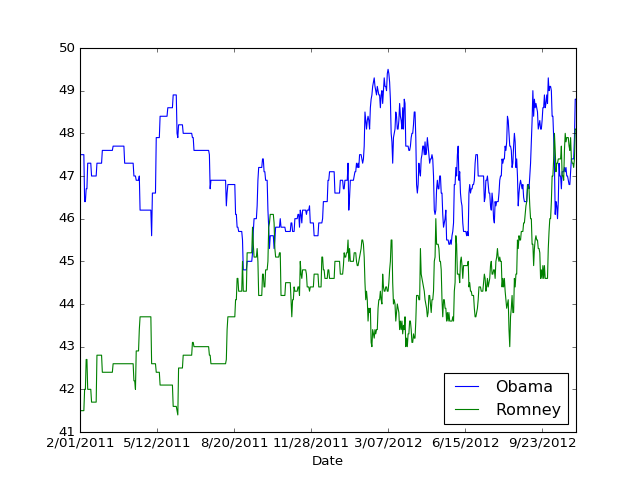

In [35]:
% matplotlib notebook
#plt.figure(figsize =(20,10))
df_el.plot()
plt.show()